# Question Guided Learning of Factor Analysis
Use your favourite literature programming tool (Jupyter Notebook) to investigate the topic of factor analysis

## What is factor analysis?


Factor analysis is a statistical method used to explore the underlying factors that explain the patterns observed in a set of variables. This technique is commonly used in areas such as psychology, finance, and social sciences to identify latent variables that cannot be measured directly but can be estimated from observed data.

### Overview

- **Objective**: To reduce the number of observed variables into a smaller number of latent factors.
- **Application**: Understanding structure in data, reducing dimensionality, and identifying latent constructs.

### Mathematical Model

The model for factor analysis can be described by the following equation:

$$
X_i = \sum_{j=1}^{m} \lambda_{ij}F_j + \epsilon_i
$$

Where:
- \(X_i\) represents the observed variables,
- \(F_j\) are the latent factors,
- \(\lambda_{ij}\) are the factor loadings, and
- \(\epsilon_i\) are the unique factors specific to each observed variable.

### Steps in Factor Analysis

1. **Extraction**: Determining the number and nature of the latent variables. Techniques like Principal Component Analysis (PCA) or Maximum Likelihood estimation are used.
2. **Rotation**: Applying orthogonal or oblique rotations to make the output more interpretable.
3. **Interpretation**: Reviewing the factor loadings to understand what each factor represents.

### Implementation in Python

Here's how you can perform a basic factor analysis using Python's `factor_analyzer` package:

In [5]:
# Import necessary libraries
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Load the data
data = pd.read_csv('data.csv')

# Initialize and fit the factor analysis model
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(data)

# Check the loadings (correlation coefficient between variable and factor)
loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Get eigenvalues and explained variance
ev, v = fa.get_eigenvalues()
print("Eigenvalues:\n", ev)

Factor Loadings:
 [[ 0.13421548  0.42745004  0.88413079]
 [ 0.84110746  0.36218282  0.15285234]
 [ 0.28815603  0.74913218  0.52530571]
 [ 0.1086151   0.88987623  0.42420084]
 [ 0.99334726 -0.04597734  0.10702482]
 [-0.86324913 -0.34940425 -0.29405799]
 [ 0.52459795  0.6544011   0.40956555]
 [ 0.27121044  0.35250258  0.86489033]]
Eigenvalues:
 [5.57231489 1.62147335 0.47477053 0.14098684 0.08260027 0.06539328
 0.02743221 0.01502864]


#### example data.csv
Personality, Intelligence, Memory, Attention, Satisfaction, Anxiety, Creativity, Critical_Thinking
3.5, 110, 25, 15, 3, 4.5, 3.8, 4.2
3, 115, 30, 16, 4, 3, 4, 4
4, 105, 35, 17, 2, 5, 3.5, 4.5
4.5, 120, 40, 18, 4, 2, 4.5, 5
3.8, 110, 25, 14, 4, 3.5, 3.2, 4.8
2.5, 100, 20, 12, 3, 4.8, 2.8, 3.5
3.2, 130, 30, 15, 5, 2.5, 3.7, 4.1
3.9, 115, 35, 17, 3, 3.2, 4.2, 4.9
3, 105, 25, 16, 2, 4.7, 3.1, 3.9
4.2, 125, 38, 18, 5, 1.5, 4.8, 5.1


## What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?

### Covariance Matrix
The covariance matrix is a matrix that summarizes the covariance (a measure of the joint variability) between several variables. In both PCA and FA, the covariance matrix forms the foundation of the analysis.

- **Definition**: If you have a dataset with `n` variables, the covariance matrix is an `n x n` matrix where each element represents the covariance between two variables.
- **Purpose**: It helps to understand how changes in one variable are associated with changes in another.

### Factor Analysis
Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of fewer unobserved variables called factors.

- **Relation to Covariance Matrix**: Factor analysis models the covariance among many variables by positing that a few hypothetical factors are responsible for the relationships among those variables.
- **Mathematical Basis**: The model assumes that observed variables are linear combinations of potential factors added to unique variances.

### Principal Component Analysis (PCA)
PCA is a dimension-reduction tool that can reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information.

- **Relation to Covariance Matrix**: PCA transforms the covariance matrix of the original variables into a new set of values called principal components, which are uncorrelated, unlike the original variables.
- **Mathematical Basis**: PCA finds the eigenvectors of the covariance matrix, and these eigenvectors are used to transform the original variables into new variables (principal components).

### Implementation in Python

Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
PCA Components:
 [[ 0.6778734   0.73517866]
 [ 0.73517866 -0.6778734 ]]
Explained Variance:
 [0.96318131 0.03681869]
Factor Loadings:
 [[0.96225219]
 [0.96225219]]


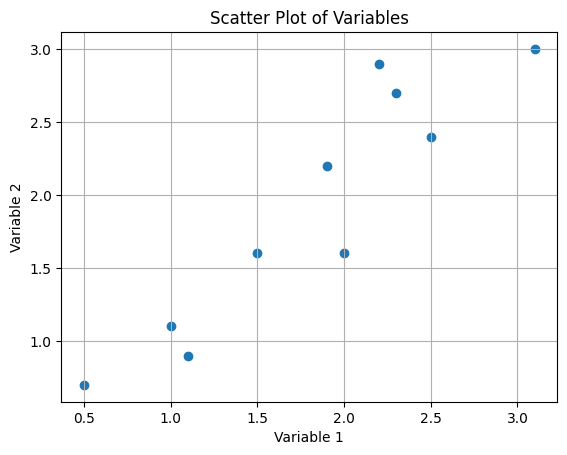

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Example Data
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2, 1.6],
                 [1, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Variable1', 'Variable2'])

# Calculate the covariance matrix
cov_matrix = np.cov(df.T)
print("Covariance Matrix:\n", cov_matrix)

# PCA
pca = PCA(n_components=2)
pca.fit(df)

print("PCA Components:\n", pca.components_)
print("Explained Variance:\n", pca.explained_variance_ratio_)

# Factor Analysis
fa = FactorAnalyzer(rotation=None, n_factors=1)
fa.fit(df)
print("Factor Loadings:\n", fa.loadings_)

# Plotting
plt.scatter(df['Variable1'], df['Variable2'])
plt.title('Scatter Plot of Variables')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

## What do we mean with loadings?

Loadings in both PCA and Factor Analysis represent key elements in interpreting the outputs of these techniques. They help in understanding how much of the variation in the data is accounted for by each factor or principal component.

### PCA Loadings
- **PCA Loadings** are the coefficients of the linear combinations of the original variables from which the principal components are constructed. These coefficients are also the eigenvectors of the covariance matrix of the data.
- **Interpretation**: Each loading in PCA shows the contribution of each original variable to the principal component. A higher absolute value of a loading indicates that the variable has a stronger influence on the component.

### Factor Analysis Loadings
- **Factor Loadings** are similar to PCA loadings but in the context of factor analysis. They represent the correlation coefficients between the original variables and the underlying factors.
- **Interpretation**: Each loading in factor analysis indicates how much of the variance in a specific original variable is explained by a particular factor. High loadings (either positive or negative) suggest that the factor is significantly associated with the variable.

### Implementation in Python


c:\Users\Alexander\Desktop\ActivityIII\.venv\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


PCA Loadings:
 [[0.6778734  0.73517866]]
Factor Loadings:
 [[0.96225219]
 [0.96225219]]


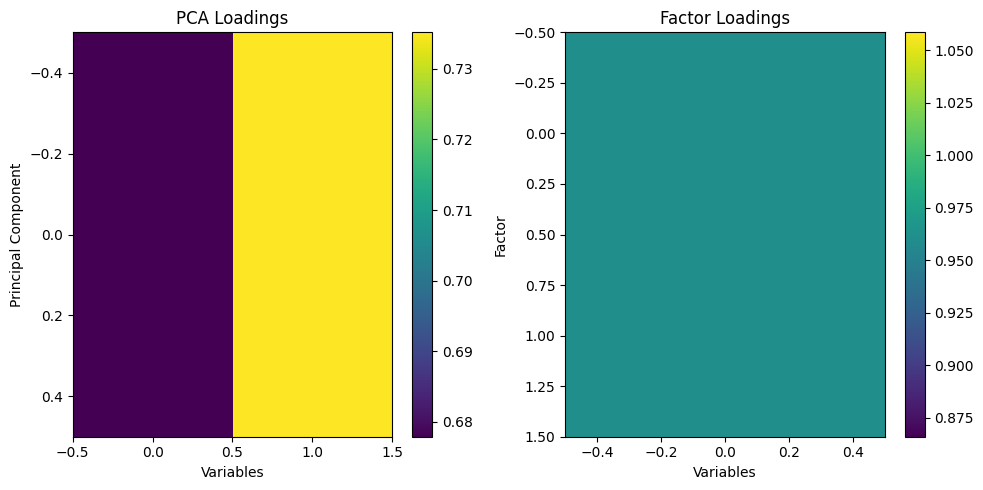

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Example Data
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2, 1.6],
                 [1, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Variable1', 'Variable2'])

# PCA
pca = PCA(n_components=1)
pca.fit(df)
pca_loadings = pca.components_

# Factor Analysis
fa = FactorAnalyzer(rotation='varimax', n_factors=1)
fa.fit(df)
fa_loadings = fa.loadings_

# Display Loadings
print("PCA Loadings:\n", pca_loadings)
print("Factor Loadings:\n", fa_loadings)

# Plotting for visual interpretation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pca_loadings, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.title('PCA Loadings')
plt.xlabel('Variables')
plt.ylabel('Principal Component')

plt.subplot(1, 2, 2)
plt.imshow(fa_loadings, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.title('Factor Loadings')
plt.xlabel('Variables')
plt.ylabel('Factor')

plt.tight_layout()
plt.show()

## Why factors are orthogonal to each other? What’s the consequence?

### Concept of Orthogonality

In the context of PCA and factor analysis, factors or principal components being orthogonal means that they are statistically independent of each other. Each factor or component captures a different aspect or dimension of the data, with no overlap in what they represent.

### Why are Factors Orthogonal?

#### PCA
- **PCA**: The objective of PCA is to transform the original correlated variables into a new set of variables (principal components) that are uncorrelated. PCA achieves this by finding the eigenvectors of the covariance matrix, which are orthogonal by definition. This ensures that each principal component captures unique variance in the data.

#### Factor Analysis
- **Factor Analysis**: Traditional factor analysis also often assumes orthogonality among factors primarily for simplification and interpretability. Orthogonal rotation methods like Varimax are used to make the loadings more interpretable while keeping the factors independent.

### Consequences of Orthogonality

#### Interpretability
- **Simplified Interpretation**: Orthogonality allows each factor or principal component to be interpreted independently of others, simplifying the understanding of what each dimension represents.

#### Independence
- **Statistical Independence**: The orthogonality implies that the dimensions do not share information; each factor explains a unique part of the variance observed in the dataset.

### Python Demonstration: Checking Orthogonality in PCA

In [9]:
import numpy as np
from sklearn.decomposition import PCA

# Generating some data
np.random.seed(0)
data = np.random.rand(100, 5)  # 100 observations of 5 variables

# Applying PCA
pca = PCA(n_components=5)
pca.fit(data)

# Principal Components
components = pca.components_

# Dot product to check orthogonality: Should be close to 0 for orthogonal vectors
dot_product = np.dot(components[0], components[1])
print("Dot product of first two principal components:", dot_product)

Dot product of first two principal components: -1.1102230246251565e-16


## How can we use factor analysis as a generative model? 


Factor analysis, traditionally used for dimension reduction and latent variable identification, can also serve as a generative model. Here’s how it works as a generative model and how you can implement it using Python.

### Concept

In factor analysis:
- **Latent Factors**: Unobserved variables (factors) are assumed to influence the observed measurements.
- **Model Assumption**: Each observed variable is modeled as a linear combination of latent factors, plus some noise. This suggests that the factors generate the observed data, subject to random variation.

### Steps in Using Factor Analysis as a Generative Model

1. **Model Specification**: Define how many factors you believe are generating the observed data.
2. **Estimate Parameters**: Fit the factor analysis model to estimate the factor loadings (which variables are influenced by which factors) and unique variances (the noise or error terms specific to each variable).
3. **Data Generation**: Once the model is fitted, you can use the estimated parameters to generate new data that should have similar statistical properties to the observed data.

### Python Implementation

Here’s how to implement factor analysis as a generative model in Python, using the `FactorAnalyzer` package:


In [10]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import make_blobs

# Generating synthetic data
data, _ = make_blobs(n_samples=100, centers=3, n_features=5, random_state=42)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Fit Factor Analysis model
fa = FactorAnalyzer(rotation=None, n_factors=2)
fa.fit(df)

# Check the factor loadings
print("Factor Loadings:\n", fa.loadings_)

# Generating new data based on the model
# Calculate new scores for factors
factor_scores = np.dot(df.values, fa.loadings_)

# Reconstruct data using the factor scores
reconstructed_data = np.dot(factor_scores, fa.loadings_.T)
generated_df = pd.DataFrame(reconstructed_data, columns=df.columns)

# Display original and generated data
print("Original Data (first 5 samples):\n", df.head())
print("Generated Data (first 5 samples):\n", generated_df.head())

Factor Loadings:
 [[-0.14727035  0.96027904]
 [-0.98368909 -0.07159137]
 [ 0.57907766 -0.51256693]
 [ 0.45809727  0.83371263]
 [ 0.99103444 -0.01423608]]
Original Data (first 5 samples):
    Feature1  Feature2  Feature3  Feature4  Feature5
0 -3.002630  9.937449  6.346484  2.846759 -6.870483
1 -5.970371 -9.040785  7.384420  2.669463  4.287546
2 -2.290559  9.896047  3.630793  0.389875 -6.105927
3 -3.463695  8.263107  3.509451  2.743147 -5.611238
4 -1.888649  8.853349  4.251614  1.087657 -7.236372
Generated Data (first 5 samples):
    Feature1   Feature2   Feature3  Feature4   Feature5
0 -2.558809  11.294098  -4.220851 -8.762503 -11.000460
1 -9.314897 -18.722187  14.741519  3.351123  19.441172
2 -2.244872  13.264533  -5.391625 -9.664510 -12.987293
3 -1.760034   9.968770  -4.010333 -7.323342  -9.753928
4 -1.611418  12.694761  -5.466822 -8.806716 -12.477194


## What is the relationship between factor analysis and autoencoder?


Factor analysis and autoencoders are both used in data analysis and machine learning to reduce the dimensionality of data and to uncover latent structures. However, they are based on different principles and computational approaches.

### Factor Analysis

- **Statistical Method**: Factor analysis is a statistical method that seeks to explain correlations among observed variables through a smaller number of unobserved variables called factors. These factors are assumed to capture the underlying processes that are causing the observed variables to correlate.
- **Linear Model**: It models each observed variable as a linear combination of latent factors plus some noise (unique variances).

### Autoencoders

- **Neural Network Architecture**: An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data. The network is designed to constrain the copy of the input to the output through an intermediate representation (the encoded form).
- **Non-linear Model**: Autoencoders can capture non-linear relationships between variables and can reconstruct the input data from the compressed encoded representation.

### Similarities

- **Dimensionality Reduction**: Both methods aim to reduce the dimensionality of the input data.
- **Latent Space**: They both transform the data into a lower-dimensional space (latent space), which is expected to capture the significant relationships in the data.

### Differences

- **Linearity**: Factor analysis is inherently linear, whereas autoencoders can capture non-linear dependencies due to their neural network architecture.
- **Flexibility**: Autoencoders, due to their flexibility and ability to model non-linearity, are generally more powerful than factor analysis for complex datasets.
- **Interpretability**: Factor analysis tends to be more interpretable because it aligns with traditional statistical methods, whereas autoencoders can be seen as "black boxes".

### Python Example: Autoencoder

Here's a simple example of an autoencoder in Python using TensorFlow and Keras, designed to perform a task similar to what factor analysis would do:



In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate some data
data = np.random.normal(size=(1000, 20))

# Define an autoencoder architecture
input_layer = Input(shape=(20,))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(20, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)

# Retrieve the encoded (compressed) layer values
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(data)

print("Encoded Data Shape:", encoded_data.shape)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2830  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2623 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2614 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2399 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2445 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2447 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2322 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2258 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2144 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2023 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2078 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2021 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1900 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1784 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1743 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━

## How can you it explain factor analysis to a high-school student?

Imagine you're trying to understand what makes a good movie. You have lots of information like the number of action scenes, the length of the movie, the number of jokes, the budget, the actors involved, and the audience's reactions.  Factor analysis helps us simplify that by finding a few underlying factors that can explain why people like or dislike certain movies.

### What is Factor Analysis?

Factor analysis is a way to take a large amount of data and boil it down to a few important themes. For example, instead of considering every single detail about hundreds of movies, factor analysis might tell us that most of the variation in movie ratings can be explained by a few key factors:
- **Entertainment Value**: Combines action scenes, jokes, and special effects.
- **Production Quality**: Includes the budget and the quality of actors.
- **Audience Engagement**: Measures how the audience reacts and relates to the movie.

These factors are like hidden ingredients that determine whether a movie is successful or not, even though we don’t see these ingredients directly.

### How Does Factor Analysis Work?

1. **Gather Data**: Collect data on various aspects of movies.
2. **Find Connections**: Use statistical methods to see which aspects are related to each other. For example, high-budget movies might tend to have more special effects.
3. **Extract Factors**: Identify a few underlying themes (factors) that explain these connections. Maybe most of the aspects that contribute to a movie's success can be grouped into those few themes like entertainment value, production quality, and audience engagement.
4. **Simplify**: Instead of dealing with hundreds of pieces of information, we now have just a few themes to consider when analyzing what makes a movie good.

### Why Use Factor Analysis?

- **Simplification**: Makes it easier to understand complex data.
- **Decision Making**: Helps movie producers focus on what really matters to make a successful movie.
- **Prediction**: Can predict how well a new movie might do based on these factors.

### Real-Life Example

Think about your school environment. What makes a good learning experience? Instead of looking at every single detail (like each teacher’s method, every textbook used, every classroom setting), factor analysis might show us that student success is mostly about:
- **Teaching Quality**
- **Student Participation**
- **Resource Availability**

Each of these factors is made up of smaller details, but factor analysis helps us see the bigger picture.

By using factor analysis, researchers, businesses, and even schools can make better decisions by focusing on the most important factors that lead to success.
